Spark SQL

In [0]:
# Reading the table name and stores data in the dataframe.
table_name = 'default.data'
df = spark.table('default.data')
df_table = spark.table('default.df_table')

In [0]:
# Total number of entries 
result = spark.sql("""
    SELECT COUNT(*) AS totalEntries
    FROM celebrities
""")
result.show()


+------------+
|totalEntries|
+------------+
|    13002531|
+------------+



In [0]:
# Calculate Age at Death for Deceased Celebrities
df.createOrReplaceTempView("celebrities")
result = spark.sql("""
   SELECT primaryName, birthYear, deathYear, deathYear - birthYear AS ageAtDeath
   FROM celebrities
   WHERE deathYear IS NOT NULL
""")
result.show()


+-------------------+---------+---------+----------+
|        primaryName|birthYear|deathYear|ageAtDeath|
+-------------------+---------+---------+----------+
|       Fred Astaire|     1899|     1987|      88.0|
|      Lauren Bacall|     1924|     2014|      90.0|
|    Brigitte Bardot|     1934|       \N|      NULL|
|       John Belushi|     1949|     1982|      33.0|
|     Ingmar Bergman|     1918|     2007|      89.0|
|     Ingrid Bergman|     1915|     1982|      67.0|
|    Humphrey Bogart|     1899|     1957|      58.0|
|      Marlon Brando|     1924|     2004|      80.0|
|     Richard Burton|     1925|     1984|      59.0|
|       James Cagney|     1899|     1986|      87.0|
|        Gary Cooper|     1901|     1961|      60.0|
|        Bette Davis|     1908|     1989|      81.0|
|          Doris Day|     1922|     2019|      97.0|
|Olivia de Havilland|     1916|     2020|     104.0|
|         James Dean|     1931|     1955|      24.0|
|    Georges Delerue|     1925|     1992|     

In [0]:
# Find Actors Who Were Also Directors
result = spark.sql("""
   SELECT nconst, primaryName, primaryProfession
   FROM celebrities
   WHERE LOWER(primaryProfession) LIKE '%actor%'
     AND nconst IN (SELECT nconst FROM celebrities WHERE LOWER(primaryProfession) LIKE '%director%')
""")
result.show()


+---------+-------------------+--------------------+
|   nconst|        primaryName|   primaryProfession|
+---------+-------------------+--------------------+
|nm0000005|     Ingmar Bergman|writer,director,a...|
|nm0000008|      Marlon Brando|actor,soundtrack,...|
|nm0000010|       James Cagney|actor,soundtrack,...|
|nm0000019|   Federico Fellini|writer,director,a...|
|nm0000024|       John Gielgud|actor,writer,dire...|
|nm0000032|    Charlton Heston|actor,director,so...|
|nm0000036|      Buster Keaton|actor,writer,dire...|
|nm0000056|        Paul Newman|actor,producer,di...|
|nm0000059|   Laurence Olivier|actor,producer,di...|
|nm0000071|      James Stewart|actor,soundtrack,...|
|nm0000080|       Orson Welles|actor,writer,dire...|
|nm0000086|     Louis de Funès|actor,writer,dire...|
|nm0000090|Armin Mueller-Stahl|actor,director,wr...|
|nm0000091|       Gérard Pirès|director,writer,a...|
|nm0000095|        Woody Allen|writer,director,a...|
|nm0000110|    Kenneth Branagh|actor,producer,

In [0]:
# Query to Find Celebrities Who Share the Same Birth Year and Death Year
result = spark.sql("""
   SELECT a.nconst AS celebrity1, a.primaryName AS name1, b.nconst AS celebrity2, b.primaryName AS name2, a.birthYear, a.deathYear
   FROM celebrities a
   JOIN celebrities b ON a.nconst < b.nconst AND a.birthYear = b.birthYear AND a.deathYear = b.deathYear
""")
result.show()


+----------+-------------------+----------+-------------------+---------+---------+
|celebrity1|              name1|celebrity2|              name2|birthYear|deathYear|
+----------+-------------------+----------+-------------------+---------+---------+
| nm0000069|      Frank Sinatra| nm9703437|        Peter Chown|     1915|     1998|
| nm0004170|           Bob Kane| nm9703437|        Peter Chown|     1915|     1998|
| nm0004305|      George Miller| nm9840969|      Sally Kempton|     1943|     2023|
| nm0004362|             Roshan| nm5713971|   Ivan A. Peterson|     1917|     1967|
| nm0004676|    Antonio Machado| nm1663889|       Alice Hetsey|     1875|     1939|
| nm0004932|         Betty Ford| nm9566873|     Annette Ontell|     1918|     2011|
| nm0005371|   Robbie Robertson| nm9840969|      Sally Kempton|     1943|     2023|
| nm0005635|  Lucien N. Andriot| nm3025860|  Nikolay Khodataev|     1892|     1979|
| nm0005870|      John F. Seitz| nm3025860|  Nikolay Khodataev|     1892|   

In [0]:
# Query to Count the Number of Celebrities Born in Each Decade
result = spark.sql("""
   SELECT FLOOR(birthYear / 10) * 10 AS birthDecade, COUNT(*) AS numCelebrities
   FROM celebrities
   GROUP BY birthDecade
   ORDER BY birthDecade
""")
result.show()


+-----------+--------------+
|birthDecade|numCelebrities|
+-----------+--------------+
|       NULL|      12405865|
|          0|             2|
|         10|             1|
|         20|             1|
|         30|             1|
|         40|             1|
|         50|             1|
|         60|             2|
|         90|             1|
|        160|             1|
|        350|             1|
|        380|             1|
|        400|             1|
|        570|             1|
|        770|             1|
|        870|             1|
|        940|             1|
|        970|             1|
|       1040|             1|
|       1080|             1|
+-----------+--------------+
only showing top 20 rows



In [0]:
result.createOrReplaceTempView("result1")


In [0]:
# Query to Rank Celebrities Based on the Number of Titles Released in Each Year
result = spark.sql("""
   SELECT nconst, primaryName, SUBSTRING(knownForTitles, 1, 4) AS releaseYear, COUNT(*) AS numTitles
   FROM celebrities
   WHERE birthYear IS NOT NULL AND knownForTitles IS NOT NULL
   GROUP BY nconst, primaryName, releaseYear
   ORDER BY numTitles DESC
""")
result.show()


+---------+--------------------+-----------+---------+
|   nconst|         primaryName|releaseYear|numTitles|
+---------+--------------------+-----------+---------+
|nm0002638|  Robert F. Phillips|       tt20|        1|
|nm0002821|   R. Orlando Duenas|       tt04|        1|
|nm0001284|       Michael Gough|       tt00|        1|
|nm0001159|        Faye Dunaway|       tt00|        1|
|nm0001125|    Benicio Del Toro|       tt01|        1|
|nm0001594|      Anne Parillaud|       tt01|        1|
|nm0002317|   Alice Duer Miller|       tt00|        1|
|nm0002028|         Sheryl Crow|       tt02|        1|
|nm0003138|Nicholas Josef vo...|       tt02|        1|
|nm0003426|      Joseph Baldwin|       tt01|        1|
|nm0003048|        Suze Randall|       tt01|        1|
|nm0002876|       Cathie Filian|       tt01|        1|
|nm0002710|    Jeremy C. Colfer|       tt01|        1|
|nm0001667|Jonathan Rhys Meyers|       tt04|        1|
|nm0003634|       Danny Mormino|       tt01|        1|
|nm0002694

In [0]:
# Query to count the number of celebrities in each primary profession

from pyspark.sql import SparkSession
from pyspark.sql.functions import col  # Importing the 'col' function

# Initialize Spark session
spark = SparkSession.builder.appName("CelebritiesVisualization").getOrCreate()

profession_counts = df_table.groupBy("primaryProfession").count().orderBy("count", ascending=False)

# Explicitly cast the count column to integer in PySpark
profession_counts = profession_counts.withColumn("count", col("count").cast("int"))

# Convert PySpark DataFrame to Pandas DataFrame for local visualization
profession_counts_pd = profession_counts.toPandas()

# Display the bar chart using Databricks display function
display(profession_counts_pd)



primaryProfession,count
null,2587035
actor,2347682
actress,1520862
miscellaneous,757489
producer,448293
camera_department,404024
art_department,244507
writer,214801
sound_department,206094
composer,160949


Databricks visualization. Run in Databricks to view.

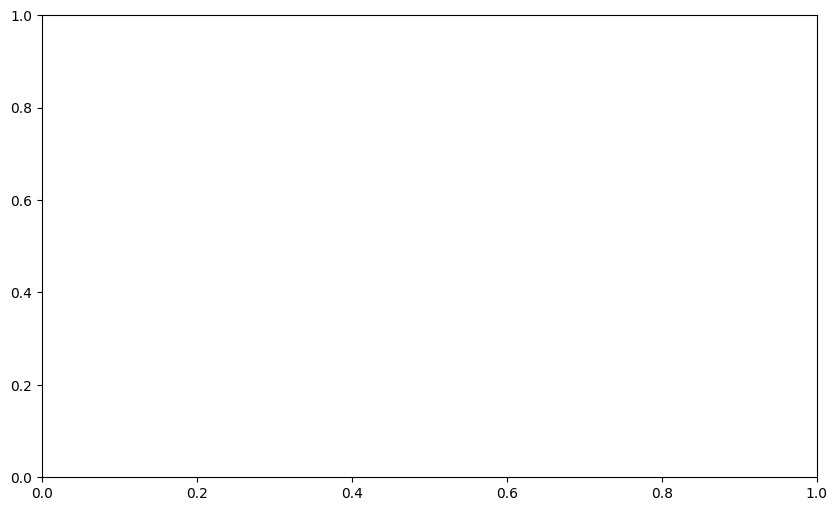

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
File /databricks/python/lib/python3.10/site-packages/matplotlib/axes/_axes.py:2373, in Axes.bar(self, x, height, width, bottom, align, **kwargs)
   2372 try:
-> 2373     left = x - width / 2
   2374 except TypeError as e:

TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

The above exception was the direct cause of the following exception:

TypeError                                 Traceback (most recent call last)
File <command-839878748378967>, line 20
     18 # Plot the bar chart
     19 plt.figure(figsize=(10, 6))
---> 20 plt.bar(profession_counts_pd["primaryProfession"], profession_counts_pd["count"], color='skyblue')
     21 plt.title("Number of Celebrities in Each Primary Profession")
     22 plt.xlabel("Primary Profession")

File /databricks/python/lib/python3.10/site-packages/matplotlib/pyplot.py:2399, in ba

In [0]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder.appName("CelebritiesVisualization").getOrCreate()

# Assuming your table name is 'default_data'
table_name = 'default.data'
df = spark.table(table_name)

# Query to count the number of celebrities in each primary profession
profession_counts = df.groupBy("primaryProfession").count().orderBy("count", ascending=False)

# Convert PySpark DataFrame to Pandas DataFrame for local visualization
profession_counts_pd = profession_counts.toPandas()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(profession_counts_pd["primaryProfession"], profession_counts_pd["count"], color='skyblue')
plt.title("Number of Celebrities in Each Primary Profession")
plt.xlabel("Primary Profession")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()


In [0]:
temp=profession_counts_pd.head(100)
temp.write.saveAsTable("res_tab")

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
File <command-1032642142990413>, line 2
      1 temp=profession_counts_pd.head(100)
----> 2 temp.write.saveAsTable("res_tab")

File /databricks/python/lib/python3.10/site-packages/pandas/core/generic.py:5575, in NDFrame.__getattr__(self, name)
   5568 if (
   5569     name not in self._internal_names_set
   5570     and name not in self._metadata
   5571     and name not in self._accessors
   5572     and self._info_axis._can_hold_identifiers_and_holds_name(name)
   5573 ):
   5574     return self[name]
-> 5575 return object.__getattribute__(self, name)

AttributeError: 'DataFrame' object has no attribute 'write'

In [0]:
%sql
select * from resx``